In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv(
    'data/long_data.csv',
    usecols=['date', 'datatype', 'value'],
    parse_dates=['date']
)[['date', 'datatype', 'value']]
wide_df.head(), long_df.head()

(        date  TMAX  TMIN  TOBS
 0 2018-10-01  21.1   8.9  13.9
 1 2018-10-02  23.9  13.9  17.2
 2 2018-10-03  25.0  15.6  16.1
 3 2018-10-04  22.8  11.7  11.7
 4 2018-10-05  23.3  11.7  18.9,
         date datatype  value
 0 2018-10-01     TMAX   21.1
 1 2018-10-01     TMIN    8.9
 2 2018-10-01     TOBS   13.9
 3 2018-10-02     TMAX   23.9
 4 2018-10-02     TMIN   13.9)

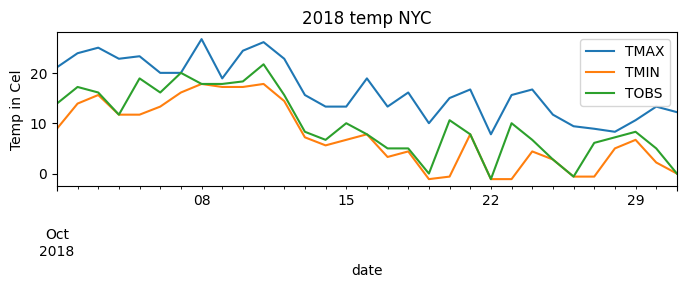

In [2]:
wide_df.plot(
    x = 'date', y=['TMAX', 'TMIN', 'TOBS'],
    figsize = (8,2), title = '2018 temp NYC'
).set_ylabel('Temp in Cel')
plt.show()

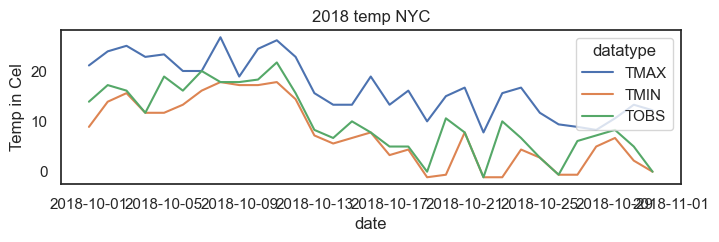

In [3]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(8,2)}, style ='white')

ax = sns.lineplot(
    data = long_df, x = 'date', y = 'value', hue = 'datatype'
)
ax.set_ylabel('Temp in Cel')
ax.set_title('2018 temp NYC')
plt.show()

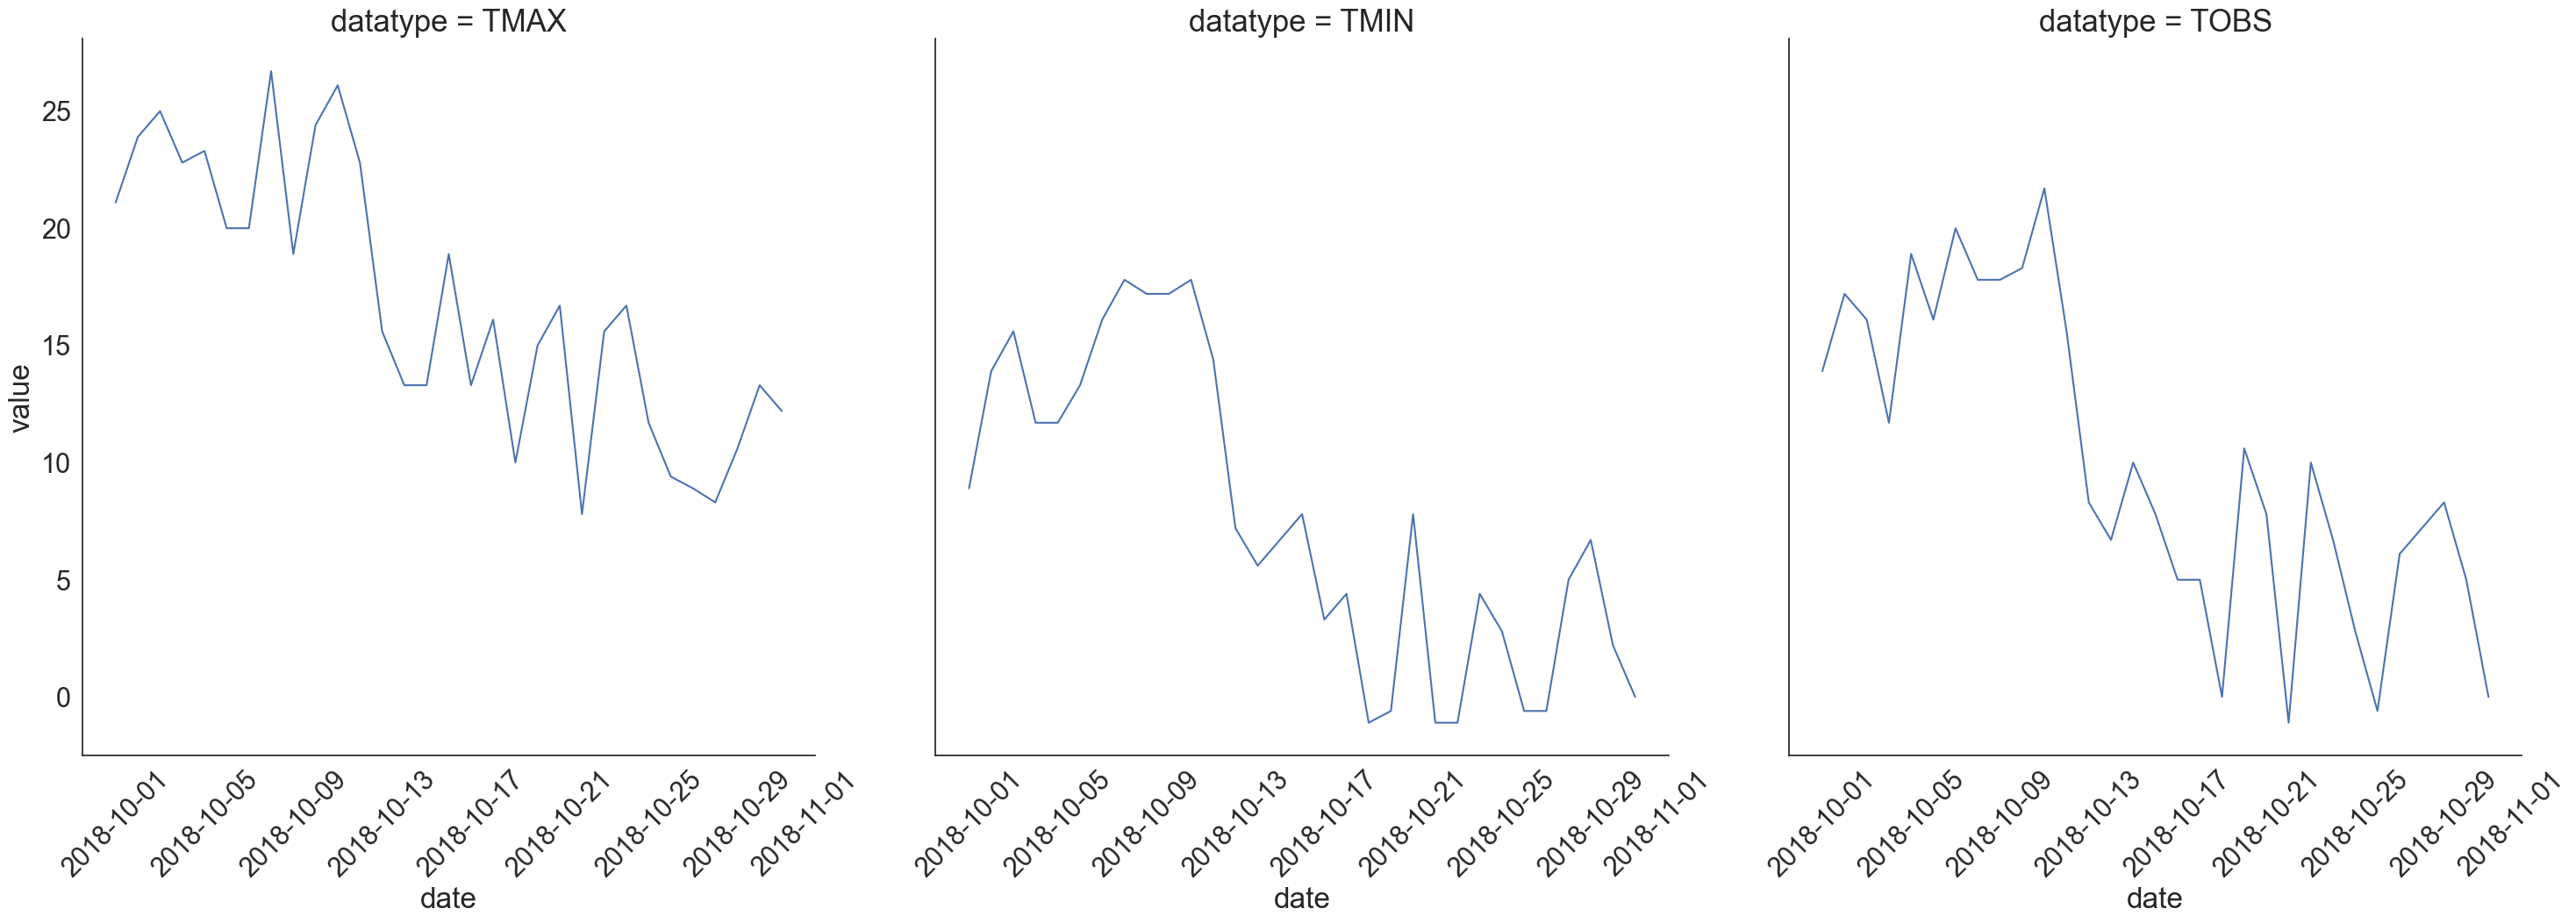

In [4]:
sns.set(
    rc={'figure.figsize':(3,2)}, style ='white', font_scale =2
)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

In [5]:
df = pd.read_csv('data/nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [6]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [7]:
df.rename(
    columns={
        'value':'temp_C',
        'attributes':'flags'
    }, inplace=True
)

In [8]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [9]:
df.rename(str.upper, axis=1).columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

In [10]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [11]:
df.loc[:,'date'] = pd.to_datetime(df.date)
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [12]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [13]:
df.date = pd.to_datetime(df.date)

In [14]:
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [15]:
df.date.describe()

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: date, dtype: object

In [16]:
pd.date_range(start='2018-10-05', periods=2, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-05 00:00:00-05:00', '2018-10-06 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

In [17]:
eastern = pd.read_csv(
    'data/nyc_temperatures.csv', index_col='date', parse_dates=True
).tz_localize('EST')
eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [18]:
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [19]:
eastern.tz_localize(None).to_period('M').index
# eastern.index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

In [20]:
eastern.tz_localize(None).to_period('M').to_timestamp().index


DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

In [21]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(
    columns={
        'value': 'temp_C',
        'attributes': 'flags'
    }
)
df.head()

,date,datatype,station,flags,temp_C
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


In [22]:
new_df = df.assign(
    date = pd.to_datetime(df.date),
    temp_F = (df.temp_C * 9/5) + 32
)
print(new_df.dtypes)
new_df.head()

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object


,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


In [23]:
df = df.assign(
    date = lambda x: pd.to_datetime(x.date),
    temp_C_whole = lambda x: x.temp_C.astype('int'),
    temp_F = lambda x: (x.temp_C * 9/5) +32,
    temp_F_whole  = lambda x: x.temp_F.astype('int')
)
df.head()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [24]:
df_with_cats = df.assign(
    station = df.station.astype('category'),
    datatype = df.datatype.astype('category')
)

df_with_cats.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int32
temp_F                 float64
temp_F_whole             int32
dtype: object

In [25]:
df_with_cats.describe(include='category')

,datatype,station
count,93,93
unique,3,1
top,TAVG,GHCND:USW00014732
freq,31,93


In [26]:
df_with_cats.station.value_counts()

station
GHCND:USW00014732    93
Name: count, dtype: int64

In [27]:
df[df.datatype == 'TMAX'].sort_values(by='temp_C', ascending = False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [28]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C','date'], ascending = [False, False]).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [29]:
df[df.datatype == 'TMAX'].sort_values(by=['temp_C','date'], ascending = [False, False], ignore_index=True).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
1,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
2,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
3,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
5,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
6,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
8,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
9,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


In [30]:
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
18,2018-10-07,TAVG,GHCND:USW00014732,"H,,S,",22.8,22,73.04,73
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
21,2018-10-08,TAVG,GHCND:USW00014732,"H,,S,",20.9,20,69.62,69
12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


In [31]:
df.nsmallest(n=5, columns=['temp_C', 'date'], keep='last')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
65,2018-10-22,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
77,2018-10-26,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
62,2018-10-21,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
74,2018-10-25,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
53,2018-10-18,TMIN,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44


In [32]:
df.sample(5, random_state=0).index

Index([2, 30, 55, 16, 13], dtype='int64')

In [33]:
df.sample(5, random_state=0).sort_index().index

Index([2, 13, 16, 30, 55], dtype='int64')

In [34]:
df.sort_index(axis=1, ascending=True).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


In [35]:
df.sort_index(axis=1).head(5).loc[:, 'temp_C':'temp_F_whole']

,temp_C,temp_C_whole,temp_F,temp_F_whole
0,21.2,21,70.16,70
1,25.6,25,78.08,78
2,18.3,18,64.94,64
3,22.7,22,72.86,72
4,26.1,26,78.98,78


In [36]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


In [37]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [38]:
df['2018-10-11':'2018-10-12'].reset_index()

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
1,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
3,2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
4,2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
5,2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


In [39]:
sp = pd.read_csv(
    'data/sp500.csv', index_col='date', parse_dates=True
).drop(columns=['adj_close'])

sp.head(10).assign(
    day_of_week = lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


In [40]:
bitcoin = pd.read_csv(
    'data/bitcoin.csv', index_col='date', parse_dates=True
).drop(columns=['market_cap'])

portfolio = pd.concat([sp, bitcoin], sort=False).groupby(level='date').sum()
portfolio.head(10).assign(
    day_of_week = lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


In [41]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

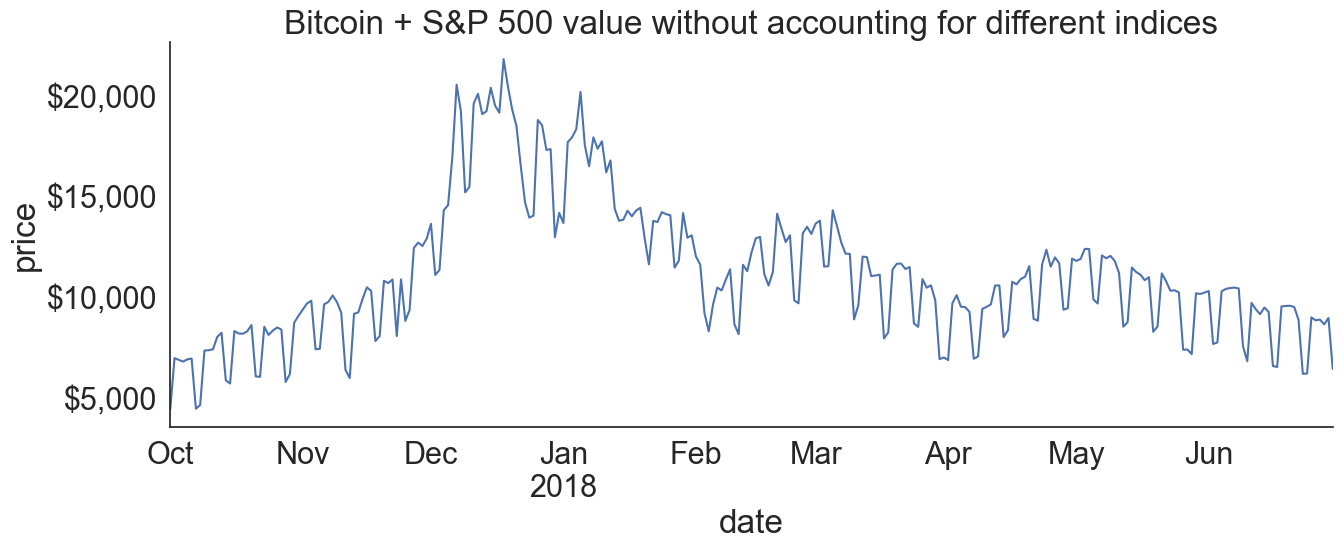

In [42]:
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y = 'close', figsize = (15, 5), legend = False,
    title = 'Bitcoin + S&P 500 value without accounting for different indices'
)

ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()

In [43]:
sp.reindex(bitcoin.index).head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,NaN,NaN,NaN,NaN,NaN,Saturday
2017-01-08,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [44]:
sp.reindex(bitcoin.index, method='ffill').head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


In [45]:
long_df = pd.read_csv(
    'data/long_data.csv', usecols=['date', 'datatype', 'value']
).rename(
    columns={'value': 'temp_C'}
).assign(
    date=lambda x: pd.to_datetime(x.date),
    temp_F=lambda x: (x.temp_C * 9/5) + 32
)
long_df.head()

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02


In [46]:
long_df.set_index('date').head(6)

,datatype,temp_C,temp_F
date,,,
2018-10-01,TMAX,21.1,69.98
2018-10-01,TMIN,8.9,48.02
2018-10-01,TOBS,13.9,57.02
2018-10-02,TMAX,23.9,75.02
2018-10-02,TMIN,13.9,57.02
2018-10-02,TOBS,17.2,62.96


In [47]:
pivot_df = long_df.pivot(index='date', columns='datatype', values='temp_C')
pivot_df.head()

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [48]:
pivot_df.describe()

datatype,TMAX,TMIN,TOBS
count,31.000000,31.000000,31.000000
mean,16.829032,7.561290,10.022581
std,5.714962,6.513252,6.596550
min,7.800000,-1.100000,-1.100000
25%,12.750000,2.500000,5.550000
50%,16.100000,6.700000,8.300000
75%,21.950000,13.600000,16.100000
max,26.700000,17.800000,21.700000


In [49]:
pivot_df = long_df.pivot(index='date', columns='datatype', values=['temp_C', 'temp_F'])
pivot_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [50]:
pivot_df.loc[:,('temp_C','TMAX')].head()

date
2018-10-01    21.1
2018-10-02    23.9
2018-10-03    25.0
2018-10-04    22.8
2018-10-05    23.3
Name: (temp_C, TMAX), dtype: float64

In [51]:
multi_index_df = long_df.set_index(['date','datatype'])
multi_index_df.head()

temp_C  temp_F
date       datatype                
2018-10-01 TMAX        21.1   69.98
           TMIN         8.9   48.02
           TOBS        13.9   57.02
2018-10-02 TMAX        23.9   75.02
           TMIN        13.9   57.02

In [52]:
unstacked_df = multi_index_df.unstack()
unstacked_df.head()

temp_C             temp_F              
datatype     TMAX  TMIN  TOBS   TMAX   TMIN   TOBS
date                                              
2018-10-01   21.1   8.9  13.9  69.98  48.02  57.02
2018-10-02   23.9  13.9  17.2  75.02  57.02  62.96
2018-10-03   25.0  15.6  16.1  77.00  60.08  60.98
2018-10-04   22.8  11.7  11.7  73.04  53.06  53.06
2018-10-05   23.3  11.7  18.9  73.94  53.06  66.02

In [53]:
wide_df = pd.read_csv('data/wide_data.csv')
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [54]:
melted_df = wide_df.melt(id_vars='date', value_vars=['TMAX', 'TMIN', 'TOBS'], var_name='measurement', value_name='temp_C')
melted_df.head()

,date,measurement,temp_C
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0
3,2018-10-04,TMAX,22.8
4,2018-10-05,TMAX,23.3


In [55]:
wide_df.set_index('date', inplace=True)
wide_df.head()

,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9


In [56]:
stacked_series = wide_df.stack()
stacked_series.head()

date            
2018-10-01  TMAX    21.1
            TMIN     8.9
            TOBS    13.9
2018-10-02  TMAX    23.9
            TMIN    13.9
dtype: float64

In [57]:
stacked_series.to_frame('values').head()

values
date                   
2018-10-01 TMAX    21.1
           TMIN     8.9
           TOBS    13.9
2018-10-02 TMAX    23.9
           TMIN    13.9

In [58]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/dirty_data.csv')
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [59]:
df.describe()

C:\ProgramData\anaconda3\envs\book_env\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\ProgramData\anaconda3\envs\book_env\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [61]:
contains_null = df[
    df.SNOW.isna() | df.SNWD.isna() | df.TOBS.isna()
    | df.WESF.isna() | df.inclement_weather.isna()
]

contains_null.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


In [62]:
def get_inf_count(df):
    return {
        col: df[df[col].isin([-np.inf, np.inf])].shape[0] for col in df.columns
    }

get_inf_count(df)

{'date': 0,
 'station': 0,
 'PRCP': 0,
 'SNOW': 0,
 'SNWD': 577,
 'TMAX': 0,
 'TMIN': 0,
 'TOBS': 0,
 'WESF': 0,
 'inclement_weather': 0}

In [63]:
pd.DataFrame({
    'np.inf snow depth':df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf snow depth':df[df.SNWD == -np.inf].SNOW.describe(),
}).T

,count,mean,std,min,25%,50%,75%,max
np.inf snow depth,24.0,101.041667,74.498018,13.0,25.0,120.5,152.0,229.0
-np.inf snow depth,553.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [64]:
df.describe(include='object')

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


In [65]:
df[df.duplicated(['date', 'station'])]

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
...,...,...,...,...,...,...,...,...,...,...
756,2018-12-28T00:00:00,?,11.4,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
758,2018-12-29T00:00:00,?,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN
761,2018-12-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
762,2018-12-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False


In [66]:
df[df.WESF.notna()].station.unique()

array(['?'], dtype=object)

In [67]:
df.date = pd.to_datetime(df.date)

station_qm_wesf = df[df.station == '?'].drop_duplicates('date').set_index('date')

df.sort_values('station', ascending= False, inplace=True)



In [68]:
df_deduped = df.drop_duplicates('date')

In [69]:
df_deduped = df_deduped.drop(columns=['station']).set_index('date').sort_index()

In [70]:
df_deduped =  df_deduped.assign(
    WESF = lambda x: x.WESF.combine_first(station_qm_wesf)
)

ValueError: Columns must be same length as key

In [81]:
df_deduped.dropna(how='all', subset=['inclement_weather', 'SNOW', 'SNWD']).shape

(293, 8)

In [79]:
df_deduped

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
2018-01-04,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,NaN,True
...,...,...,...,...,...,...,...,...
2018-12-27,0.0,0.0,-inf,5.6,-2.2,-1.1,NaN,False
2018-12-28,11.7,0.0,-inf,6.1,-1.7,5.0,NaN,False
2018-12-29,21.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


In [82]:
df_deduped.loc[:,'WESF'].fillna(0, inplace = True)
df_deduped.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,5505.0,-40.0,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


In [87]:
df_deduped = df_deduped.assign(
    TMAX = lambda x: x.TMAX.replace(5505, np.nan),
    TMIN = lambda x: x.TMIN.replace(-40, np.nan)
)


In [89]:
df_deduped.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,inf,NaN,NaN,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


In [91]:
df_deduped.assign(
    TMAX = lambda x: x.TMAX.fillna(method = 'ffill'),
    TMIN  = lambda x: x.TMIN.fillna(method='ffill')
).head()

C:\Users\1015894\AppData\Local\Temp\ipykernel_17180\4011447162.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TMAX = lambda x: x.TMAX.fillna(method = 'ffill'),
C:\Users\1015894\AppData\Local\Temp\ipykernel_17180\4011447162.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  TMIN  = lambda x: x.TMIN.fillna(method='ffill')


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,inf,-4.4,-13.9,NaN,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.9,0.0,True


In [92]:
df_deduped.assign(
    SNWD = lambda x: x.SNWD.clip(0, x.SNOW)
).head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,0.0,-8.3,-16.1,-12.2,0.0,False
2018-01-03,0.0,0.0,0.0,-4.4,-13.9,-13.3,0.0,False
2018-01-04,20.6,229.0,229.0,-4.4,-13.9,NaN,19.3,True
2018-01-05,14.2,127.0,127.0,-4.4,-13.9,-13.9,0.0,True


In [93]:
df_deduped.apply(
    lambda x: x.fillna(x.rolling(7, min_periods=0).median())
)

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01,0.0,0.0,-inf,NaN,NaN,NaN,0.0,NaN
2018-01-02,0.0,0.0,-inf,-8.3,-16.1,-12.20,0.0,False
2018-01-03,0.0,0.0,-inf,-4.4,-13.9,-13.30,0.0,False
2018-01-04,20.6,229.0,inf,-4.4,-13.9,-12.75,19.3,True
2018-01-05,14.2,127.0,inf,-4.4,-13.9,-13.90,0.0,True
